In [65]:
#Author Maria Giselle Fernandez-Godino
#email: mariagisellefernandez@gmail.com

In [66]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, Bidirectional, RepeatVector, TimeDistributed, Flatten, Reshape
from sklearn.model_selection import train_test_split

In [67]:
n=100000
m=1000
total=n+m
delta_t=0.01
s=501
p=100

def lorenz(v1, v2, v3, a=10, b=8/3, r=28):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    v1_dot = a*(v2-v1)
    v2_dot = -a*v1 - v2 - v2*v3
    v3_dot = v1*v2 - b*v3 - b*(r+a)
    return v1_dot, v2_dot, v3_dot

# Need one more for the initial values
xs = np.empty(total + 1)
ys = np.empty(total + 1)
zs = np.empty(total + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 3., 8.)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(total):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * delta_t)
    ys[i + 1] = ys[i] + (y_dot * delta_t)
    zs[i + 1] = zs[i] + (z_dot * delta_t)

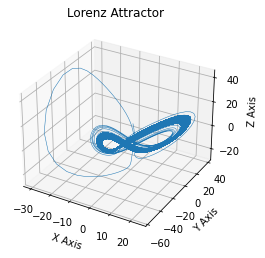

In [68]:
# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [69]:
# Scaled to work with Neural networks.
xs_scaled = (xs-np.min(xs))/(np.max(xs)-np.min(xs))
ys_scaled = (ys-np.min(ys))/(np.max(ys)-np.min(ys))
zs_scaled = (zs-np.min(zs))/(np.max(zs)-np.min(zs))

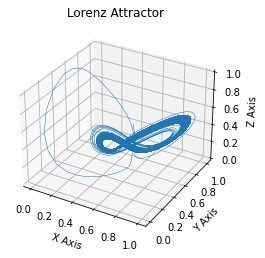

In [91]:
# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs_scaled, ys_scaled, zs_scaled, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [71]:
xs1_train = []
xs2_train = []
for i in range(s,n):
    xs1_train.append(xs_scaled[i-s:i])
    xs2_train.append(xs_scaled[i:i+p])
xs1_train, xs2_train = np.array(xs1_train), np.array(xs2_train)

In [72]:
ys1_train = []
ys2_train = []
for i in range(s,n):
    ys1_train.append(ys_scaled[i-s:i])
    ys2_train.append(ys_scaled[i:i+p])
ys1_train, ys2_train = np.array(ys1_train), np.array(ys2_train)

In [73]:
zs1_train = []
zs2_train = []
for i in range(s,n):
    zs1_train.append(zs_scaled[i-s:i])
    zs2_train.append(zs_scaled[i:i+p])
zs1_train, zs2_train = np.array(zs1_train), np.array(zs2_train)

In [74]:
print(xs2_train[-1])
print(ys2_train[-1])
print(zs2_train[-1])

[0.53663708 0.54866383 0.56097963 0.57370781 0.58699345 0.60100437
 0.61593128 0.63198646 0.64939954 0.66840835 0.68924207 0.71209238
 0.73706815 0.76412845 0.79299207 0.82302903 0.85315581 0.88178005
 0.90686468 0.92617934 0.93774534 0.94035221 0.9339092  0.91942985
 0.89866158 0.87358338 0.8460095  0.81739382 0.78879731 0.76094022
 0.73427945 0.70908125 0.68547914 0.6635168  0.64317843 0.62440987
 0.60713304 0.59125587 0.5766789  0.56329978 0.55101627 0.53972811
 0.52933823 0.51975353 0.51088519 0.50264888 0.49496479 0.48775755
 0.48095616 0.47449389 0.46830824 0.46234091 0.45653788 0.45084959
 0.44523126 0.43964326 0.4340518  0.42842962 0.42275698 0.41702275
 0.41122565 0.40537562 0.39949514 0.39362043 0.38780249 0.3821075
 0.3766167  0.37142524 0.36663999 0.3623761  0.35875236 0.35588555
 0.35388408 0.35284151 0.35283064 0.35389874 0.35606453 0.35931729
 0.36361816 0.3689033  0.37508861 0.38207535 0.38975603 0.39802006
 0.40675882 0.41586979 0.42525978 0.43484729 0.44456394 0.45435

In [75]:
def LSTM_model(input_):
    print('encoder')
    print(input_.shape)
    x = LSTM(10, input_shape=(s,3))(input_)
    print(x.shape)
    x = Flatten()(x)
    print(x.shape)
    x = RepeatVector(100)(x)
    print(x.shape)
    x = LSTM(10,return_sequences=True)(x)
    print(x.shape)
    x = TimeDistributed(Dense(100))(x)
    print(x.shape)
    output = TimeDistributed(Dense(3,activation="sigmoid"))(x)
    print(output.shape)
    return output

In [76]:
input_ = tensorflow.keras.Input(shape=(s,3))
LSTM_model = tensorflow.keras.Model(input_, LSTM_model(input_))

encoder
(None, 501, 3)
(None, 10)
(None, 10)
(None, 100, 10)
(None, 100, 10)
(None, 100, 100)
(None, 100, 3)


In [77]:
opt = tensorflow.keras.optimizers.Adam()
LSTM_model.compile(optimizer=opt, loss='mse')
LSTM_model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 501, 3)]          0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 10)                560       
_________________________________________________________________
flatten_14 (Flatten)         (None, 10)                0         
_________________________________________________________________
repeat_vector_14 (RepeatVect (None, 100, 10)           0         
_________________________________________________________________
lstm_28 (LSTM)               (None, 100, 10)           840       
_________________________________________________________________
time_distributed_20 (TimeDis (None, 100, 100)          1100      
_________________________________________________________________
time_distributed_21 (TimeDis (None, 100, 3)            303 

In [81]:
X_train=np.concatenate((xs1_train.reshape(-1,s,1), ys1_train.reshape(-1,s,1), zs1_train.reshape(-1,s,1)), axis=2)
y_train=np.concatenate((xs2_train.reshape(-1,1),ys2_train.reshape(-1,1),zs2_train.reshape(-1,1)),axis=1).reshape(-1,100,3)

In [82]:
X_train.shape

(99499, 501, 3)

In [83]:
y_train.shape

(99499, 100, 3)

In [84]:
epochs=20
LSTM_model.fit(X_train,y_train,epochs=epochs,batch_size=128)

Epoch 1/20
778/778 [==============================] - 98s 122ms/step - loss: 0.0209
Epoch 2/20
778/778 [==============================] - 91s 117ms/step - loss: 0.0025
Epoch 3/20
778/778 [==============================] - 88s 113ms/step - loss: 0.0016
Epoch 4/20
778/778 [==============================] - 80s 102ms/step - loss: 0.0013
Epoch 5/20
778/778 [==============================] - 96s 123ms/step - loss: 0.0010
Epoch 6/20
778/778 [==============================] - 100s 129ms/step - loss: 8.1519e-04
Epoch 7/20
778/778 [==============================] - 96s 123ms/step - loss: 6.9606e-04
Epoch 8/20
778/778 [==============================] - 94s 121ms/step - loss: 6.2766e-04
Epoch 9/20
778/778 [==============================] - 103s 132ms/step - loss: 5.5790e-04
Epoch 10/20
778/778 [==============================] - 98s 126ms/step - loss: 5.0635e-04
Epoch 11/20
778/778 [==============================] - 94s 121ms/step - loss: 4.8313e-04
Epoch 12/20
778/778 [===========================

In [85]:
LSTM_model.save('LSTM_paper_model.h5')

In [86]:
import tensorflow as tf
LSTM_model = tf.keras.models.load_model('LSTM_paper_model.h5')

In [87]:
y_train_pred=LSTM_model.predict(X_train)

In [88]:
y_train_pred.shape

(99499, 100, 3)

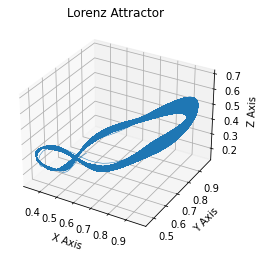

In [90]:
# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(y_train_pred[:,-1,0], y_train_pred[:,-1,1], y_train_pred[:,-1,2], lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

(99900.0, 100000.0)

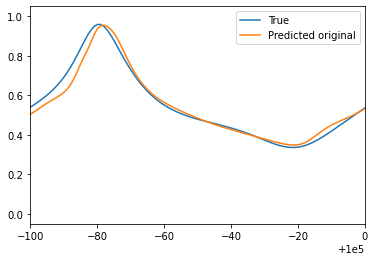

In [92]:
plt.plot(np.linspace(0,n,n),xs_scaled[:n],label='True')
plt.plot(np.linspace(s,n,n-s),y_train_pred[:,-1,0],label='Predicted original')
plt.legend()
plt.xlim([99900,100000])

In [93]:
np.linspace(s,len(xs_scaled),len(xs_scaled)-s-1).shape

(100499,)

(99900.0, 100000.0)

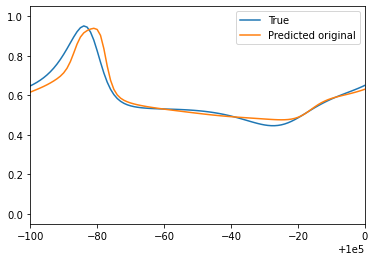

In [94]:
plt.plot(np.linspace(0,n,n),ys_scaled[:n],label='True')
plt.plot(np.linspace(s,n,n-s),y_train_pred[:,-1,1],label='Predicted original')
plt.legend()
#plt.xlim([0,100])
plt.xlim([99900,100000])

(99900.0, 100000.0)

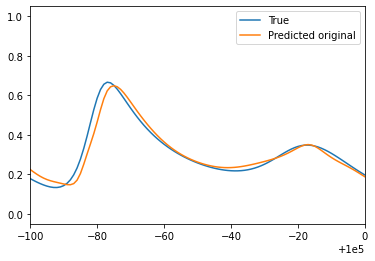

In [95]:
plt.plot(np.linspace(0,n,n),zs_scaled[:n],label='True')
plt.plot(np.linspace(s,n,n-s),y_train_pred[:,-1,2],label='Predicted original')
plt.legend()
#plt.xlim([0,200])
plt.xlim([99900,100000])

## Predicting the future

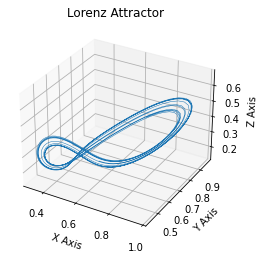

In [96]:
# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs_scaled[n:n+m], ys_scaled[n:n+m], zs_scaled[n:n+m], lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [97]:
print(xs_scaled[n:n+m][0])
print(ys_scaled[n:n+m][0])
print(zs_scaled[n:n+m][0])

0.5486638293106105
0.6591834912123266
0.18690398394432922


In [101]:
y_f = LSTM_model.predict(X1)

In [103]:
y_f.shape

(1, 100, 3)

In [118]:
xs1_f = []; xs2_f = []
ys1_f = []; ys2_f = []
zs1_f = []; zs2_f = []

xs1_f.append(X_train[-1,:,0])
ys1_f.append(X_train[-1,:,1])
zs1_f.append(X_train[-1,:,2])

yf=[]

for j in range(m):
    X1 = np.concatenate((xs1_f[-1].reshape(-1,s,1), ys1_f[-1].reshape(-1,501,1), zs1_f[-1].reshape(-1,501,1)), axis=2)
    y_f = LSTM_model.predict(X1)
    xs2_f.append(y_f[0][:,0]); ys2_f.append(y_f[0][:,1]); zs2_f.append(y_f[0][:,2])
    a=np.hstack((X1[0,100:,:].reshape(1,401,3),y_f[-1].reshape(1,100,3)))   
    xs1_f.append(a[0][:,0]); ys1_f.append(a[0][:,1]); zs1_f.append(a[0][:,2])


In [128]:
len(xs2_f)

1000

In [120]:
print(xs2_f[0])
print(ys2_f[0])
print(zs2_f[0])

[0.48735186 0.5086634  0.52868277 0.54866    0.56882757 0.5891653
 0.60950744 0.62976885 0.6500868  0.67081547 0.6924522  0.7155722
 0.7407712  0.7685574  0.7990912  0.8316514  0.8639718  0.8923512
 0.9134588  0.9262804  0.9318367  0.93159217 0.92649794 0.91694164
 0.9030619  0.88504434 0.8632816  0.8384098  0.81126654 0.782811
 0.7540345  0.7258706  0.69911206 0.6743422  0.6518998  0.6318819
 0.6141863  0.5985772  0.584757   0.57242477 0.5613143  0.5512094
 0.5419453  0.5333998  0.5254814  0.5181187  0.51125216 0.50482774
 0.4987944  0.49310124 0.487697   0.48253003 0.47754884 0.47270203
 0.46793967 0.46321398 0.45847905 0.4536935  0.44881907 0.44382274
 0.438677   0.43336055 0.42785925 0.422167   0.41628608 0.41022915
 0.40401882 0.39769036 0.3912918  0.3848862  0.378552   0.37238526
 0.36650032 0.36103082 0.35612863 0.3519637  0.34871888 0.3465829
 0.34573925 0.34635103 0.34854192 0.35237813 0.35785037 0.36486867
 0.37326312 0.3828011  0.39321214 0.40421757 0.41555876 0.42701843
 0.

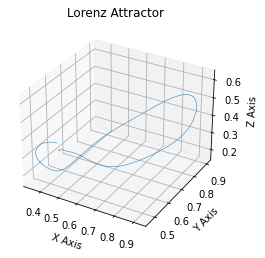

In [123]:
# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs2_f[-1], ys2_f[-1], zs2_f[-1], lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

(0.0, 1000.0)

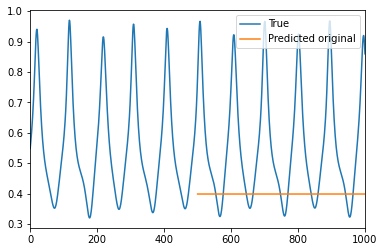

In [144]:
plt.plot(np.linspace(0,m,m),xs_scaled[n:n+m],label='True')
plt.plot(np.linspace(s-1,m,m-s),np.array(xs2_f[s:])[:,-1],label='Predicted original')
plt.legend()
plt.xlim([0,1000])

In [143]:
np.array(xs2_f[s:])[:,-1].shape

(499,)

(0.0, 1000.0)

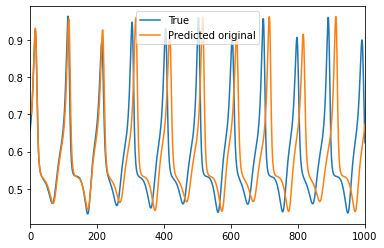

In [49]:
plt.plot(np.linspace(0,m,m),ys_scaled[n:n+m],label='True')
plt.plot(np.linspace(s-1,m,m-s),ys2_f[s:],label='Predicted original')
plt.legend()
plt.xlim([0,1000])

(0.0, 1000.0)

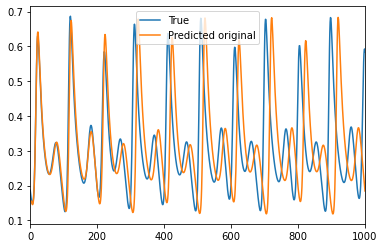

In [50]:
plt.plot(np.linspace(0,m,m),zs_scaled[n:n+m],label='True')
plt.plot(np.linspace(s-1,m,m-s),zs2_f[s:],label='Predicted original')
plt.legend()
plt.xlim([0,1000])